<a href="https://colab.research.google.com/github/AshishGtmMishra/ML-SM-projects-and-tutorials/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Decision Trees for Classification and Regression**

Decision tree classification on iris dataset (from sklearn datasets library) and Decision Tree Regression on a random dataset. Here I have explained differnt concepts of the decision trees from visualization to Hyperparameters Regularization.

The notebook has line by line explanation of every important code, so that it is beginner friendly.

Reference: [Hands-on Machine Learning O'Reilly book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

### Setup

In [15]:
import sklearn
import matplotlib.pyplot as plt

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

In [16]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Training and Visualizing Decision Tree

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)



- `from sklearn.datasets import load_iris`: This line imports the `load_iris` function from the `sklearn.datasets` module. This function returns the iris dataset, which is a classic dataset for classification problems. The iris dataset contains 150 samples of three different species of iris flowers, along with four features: sepal length, sepal width, petal length, and petal width.

- `from sklearn.tree import DecisionTreeClassifier`: This line imports the `DecisionTreeClassifier` class from the `sklearn.tree` module. This class implements a decision tree algorithm for classification, which is a non-parametric method that learns simple rules from the data to predict the target variable.

- `iris = load_iris(as_frame = True)`: This line calls the `load_iris` function with the parameter `as_frame = True`, which means that the returned dataset will be a pandas DataFrame object. A DataFrame is a two-dimensional data structure that can store data of different types in labeled rows and columns.

- `X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values`: This line extracts the values of the two features "petal length (cm)" and "petal width (cm)" from the `iris.data` DataFrame, and assigns them to the variable `X_iris`. `X_iris` is a numpy array that contains the input data for the decision tree classifier.

- `y_iris = iris.target`: This line assigns the `iris.target` attribute to the variable `y_iris`. `iris.target` is a pandas Series object that contains the labels of the target variable, which are the species of the iris flowers: 0 for setosa, 1 for versicolor, and 2 for virginica.

- `tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=42)`: This line creates an instance of the `DecisionTreeClassifier` class with the parameters `max_depth = 2` and `random_state=42`. The `max_depth` parameter controls the maximum depth of the tree, which is the number of levels of nodes from the root to the leaves. The `random_state` parameter controls the randomness of the algorithm, which affects the selection of the features and the splits at each node.

- `tree_clf.fit(X_iris, y_iris)`: This line trains the decision tree classifier on the input data `X_iris` and the target labels `y_iris`. The `fit` method builds the tree from the data and learns the optimal rules to classify the samples.




In [18]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = str(IMAGES_PATH / "iris_tree.dot"),
    feature_names = ["petal length (cm)", "petal width (cm)"],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

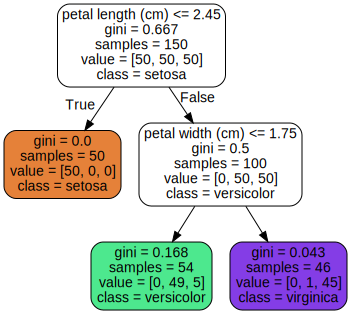

In [19]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")


- `from sklearn.tree import export_graphviz`: This line imports the `export_graphviz` function from the `sklearn.tree` module. This function exports a decision tree in DOT format, which is a language for describing graphs.

- `export_graphviz(`: This line starts the function call with the following arguments:

    - `tree_clf`: This is the decision tree estimator that was trained on the iris data in the previous code cell. It contains the learned rules for classifying the iris flowers based on their petal length and width.

    - `out_file = str(IMAGES_PATH / "iris_tree.dot")`: This is the name of the output file where the DOT representation of the tree will be written. The `IMAGES_PATH` variable was defined earlier as a `Path` object that points to the `images/decision_trees` folder. The `str` function converts the `Path` object to a string.

    - `feature_names = ["petal length (cm)", "petal width (cm)"]`: This is a list of the feature names that will be used to label the nodes of the tree. The iris dataset has four features, but only two were used for the decision tree: petal length and petal width.

    - `class_names = iris.target_names`: This is a list of the class names that will be used to label the leaves of the tree. The iris dataset has three classes: setosa, versicolor, and virginica.

    - `rounded = True`: This is a boolean argument that controls whether the node boxes will have rounded corners or not. Setting it to `True` makes the tree look nicer.

    - `filled = True`: This is a boolean argument that controls whether the nodes will be colored according to the majority class or the value range. Setting it to `True` makes the tree easier to interpret.
- `)`: This line ends the function call.

The result of this code is a file named `iris_tree.dot` in the `images/decision_trees` folder, which contains the DOT representation of the decision tree. This file can be converted to other formats, such as PNG or PDF, using the `dot` command or the `graphviz` library. For example:

```python
from graphviz import Source
Source.from_file(IMAGES_PATH / "iris_tree.dot")
```


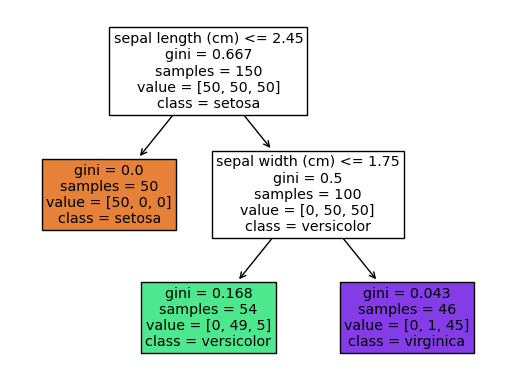

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure()

tree.plot_tree(tree_clf,feature_names = iris['feature_names'], class_names = iris['target_names'], filled=True)
plt.show()


### Making Predictions

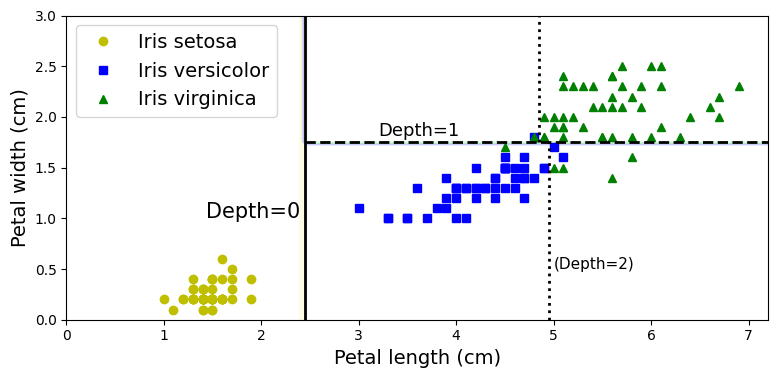

In [21]:
import numpy as np

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize = (8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contour(lengths, widths, y_pred, alpha = 0.3, cmap = custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
   plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

- `import numpy as np`: This line imports the `numpy` library and gives it the alias `np`. `numpy` is a popular library for numerical computing in Python, and provides support for arrays, matrices, and mathematical operations.
- `from matplotlib.colors import ListedColormap`: This line imports the `ListedColormap` class from the `matplotlib.colors` module. A colormap is a mapping between values and colors, and is used to represent data in a visual way.
- `custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])`: This line creates a custom colormap with three colors: yellow, blue, and green. This colormap will be used to color the decision regions of the classifier.
- `plt.figure(figsize = (8, 4))`: This line creates a new figure with a size of 8 inches by 4 inches. A figure is a container for one or more plots, and can contain axes, titles, legends, and other elements.
- `lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))`: This line creates a grid of points with 100 equally spaced values between 0 and 7.2 for the petal length, and 100 equally spaced values between 0 and 3 for the petal width. The `meshgrid` function returns two arrays with the same shape, which represent the coordinates of the points in the grid.
- `X_iris_all = np.c_[lengths.ravel(), widths.ravel()]`: This line flattens the two arrays returned by `meshgrid` into two columns, and concatenates them horizontally using the `c_` function from `numpy`. The resulting array has 10000 rows and 2 columns, and represents all possible combinations of petal length and width in the grid.
- `y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)`: This line applies the decision tree classifier `tree_clf` to the input data `X_iris_all`, and predicts the class labels for each point in the grid. The resulting array has 10000 elements, and represents the predicted class labels for each point in the grid. The `reshape` function converts the flat array back into a 2D array with the same shape as the grid.
- `plt.contour(lengths, widths, y_pred, alpha = 0.3, cmap = custom_cmap)`: This line creates a contour plot of the predicted class labels for the grid. A contour plot is a way to visualize a 3D surface by drawing lines of constant value on a 2D plane. The `contour` function takes three arguments: the x-coordinates, the y-coordinates, and the z-coordinates (i.e., the predicted class labels). The `alpha` parameter controls the transparency of the lines, and the `cmap` parameter specifies the colormap to use.
- `for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):`: This line iterates over the three target names in the iris dataset (`setosa`, `versicolor`, and `virginica`), and assigns a different marker style to each one (`yo`, `bs`, and `g^`). The `enumerate` function returns a tuple with the index and the value of each element in the list.
- `plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx], style, label=f"Iris {name}")`: This line plots the petal length and width of the iris flowers in the dataset, using the marker style corresponding to their target class. The `X_iris[:, 0]` and `X_iris[:, 1]` expressions extract the petal length and width from the input data, and the `y_iris == idx` expression selects only the samples with the current target class. The `style` parameter specifies the marker style, and the `label` parameter adds a legend label to the plot.
- `tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)`: This line creates a new decision tree classifier with a maximum depth of 3, and a fixed random state of 42. The `max_depth` parameter controls the maximum depth of the tree, which limits the number of splits and the complexity of the model. The `random_state` parameter controls the randomness of the algorithm, which affects the selection of the features and the splits at each node.


- `tree_clf_deeper.fit(X_iris, y_iris)`: This line trains a decision tree classifier on the input data X_iris and the target labels y_iris. The variable tree_clf_deeper is an instance of the DecisionTreeClassifier class with a higher max_depth parameter than the previous tree_clf variable. This means that the tree will grow deeper and have more nodes and branches.
- `th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]`: This line extracts the threshold values of the four nodes that split the data based on the petal length and petal width features. The variable tree_clf_deeper.tree_ is an object that stores the tree structure and attributes. The attribute threshold is an array that contains the threshold value for each node. The indices [0, 2, 3, 6] correspond to the nodes that are shown in the figure below¹.
- `plt.xlabel("Petal length (cm)")`: This line sets the label of the x-axis to "Petal length (cm)" using the matplotlib.pyplot library, which is used for plotting graphs and figures in Python.
- `plt.ylabel("Petal width (cm)")`: This line sets the label of the y-axis to "Petal width (cm)" using the same library.
- `plt.plot([th0, th0], [0, 3], "k-", linewidth=2)`: This line plots a vertical line from (th0, 0) to (th0, 3) using a black solid line ("k-") with a width of 2 pixels. This line represents the first split of the root node based on the petal length feature.
- `plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)`: This line plots a horizontal line from (th0, th1) to (7.2, th1) using a black dashed line ("k--") with a width of 2 pixels. This line represents the second split of the right child node of the root node based on the petal width feature.
- `plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)`: This line plots a vertical line from (th2a, 0) to (th2a, th1) using a black dotted line ("k:") with a width of 2 pixels. This line represents the third split of the left child node of the right child node of the root node based on the petal length feature.
- `plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)`: This line plots a vertical line from (th2b, th1) to (th2b, 3) using a black dotted line ("k:") with a width of 2 pixels. This line represents the fourth split of the right child node of the right child node of the root node based on the petal length feature.
- `plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)`: This line adds a text annotation at the position (th0 - 0.05, 1.0) with the content "Depth=0", which indicates the depth of the root node. The text is aligned to the right and has a font size of 15 pixels.
- `plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)`: This line adds a text annotation at the position (3.2, th1 + 0.02) with the content "Depth=1", which indicates the depth of the right child node of the root node. The text is aligned to the bottom and has a font size of 13 pixels.
- `plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)`: This line adds a text annotation at the position (th2a + 0.05, 0.5) with the content "(Depth=2)", which indicates the depth of the left child node of the right child node of the root node. The text has a font size of 11 pixels.
- `plt.axis([0, 7.2, 0, 3])`: This line sets the limits of the x-axis and y-axis to [0, 7.2] and [0, 3], respectively.
- `plt.legend()`: This line adds a legend to the figure, which shows the labels of the three classes of the iris dataset: setosa, versicolor, and virginica.
- `save_fig`("decision_tree_decision_boundaries_plot"): This line saves the figure to a file named "decision_tree_decision_boundaries_plot.png" in the IMAGES_PATH directory, which is defined in the previous code. The save_fig function is a custom function that uses the plt.savefig method with some parameters such as tight_layout, fig_extension, and resolution.
- `plt.show()`: This line displays the figure on the screen.


### Estimating Class Probabilities

In [22]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [23]:
tree_clf.predict([[5, 1.5]])

array([1])

So the above instance belongs to **versicolor** class.

### Regularization Hyperparameters

In [24]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples = 150, noise = 0.2, random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state = 42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)


`from sklearn.datasets import make_moons`: This line imports the make_moons function from the sklearn.datasets module. This function returns a toy dataset of two interleaving half circles, which can be used to demonstrate clustering and classification algorithms.

`X_moons, y_moons = make_moons(n_samples = 150, noise = 0.2, random_state = 42)`: This line calls the make_moons function with the following parameters:

- `n_samples = 150`: This specifies the number of samples to generate in the dataset.
- `noise = 0.2`: This adds some Gaussian noise to the data, making it more realistic and challenging.
- `random_state = 42`: This sets the seed for the random number generator, ensuring reproducibility of the results.

The function returns two numpy arrays: X_moons, which contains the features (x and y coordinates) of the samples, and y_moons, which contains the labels (0 or 1) of the samples.

`tree_clf1 = DecisionTreeClassifier(random_state = 42)`: This line creates an instance of the DecisionTreeClassifier class, which implements a decision tree algorithm for classification. The only parameter passed to the constructor is random_state = 42, which controls the randomness of the estimator. The other parameters are set to their default values, such as criterion = 'gini', splitter = 'best', and max_depth = None.

`tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state = 42)`: This line creates another instance of the DecisionTreeClassifier class, but with a different parameter: min_samples_leaf=5. This specifies the minimum number of samples required to be at a leaf node, which can prevent overfitting by reducing the complexity of the tree. The other parameters are the same as tree_clf1.

`tree_clf1.fit(X_moons, y_moons)`: This line trains the first decision tree classifier on the input data X_moons and the target labels y_moons. The fit method builds the tree from the data and learns the optimal rules to classify the samples.

`tree_clf2.fit(X_moons, y_moons)`: This line trains the second decision tree classifier on the same data as the first one. The fit method is the same as tree_clf1, but the resulting tree may be different due to the different min_samples_leaf parameter.



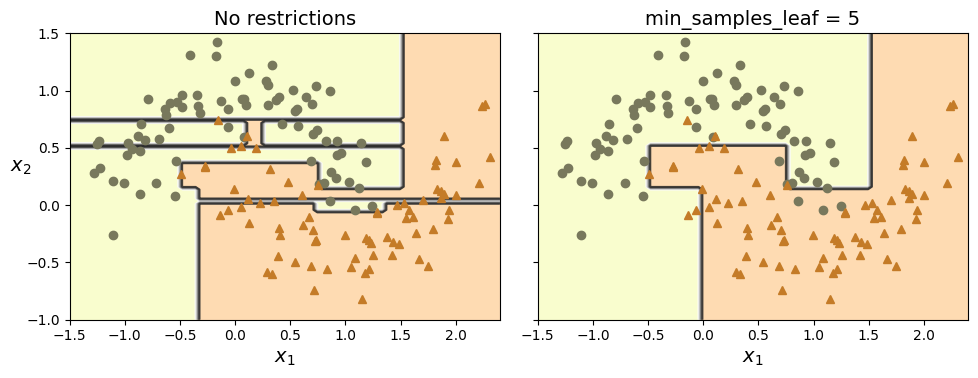

In [25]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()


- It defines a function named plot_decision_boundary that takes five arguments: clf, X, y, axes, and cmap. The function is used to plot the decision boundary of a given classifier (clf) on a given dataset (X and y) with a given range of axes and a given color map (cmap).
- The function creates a mesh grid of points (x1 and x2) using the numpy.linspace and numpy.meshgrid functions. The mesh grid covers the range of the axes argument, which is a list of four numbers: [xmin, xmax, ymin, ymax].
- The function then flattens the mesh grid into a two-dimensional array (X_new) using the numpy.c_ function. This array contains the coordinates of all the points in the mesh grid.
- The function then uses the clf.predict method to predict the class labels of the points in X_new. The predicted labels are reshaped into the same shape as the mesh grid (y_pred) using the numpy.reshape method.
- The function then uses the matplotlib.pyplot.contourf and matplotlib.pyplot.contour functions to plot the filled and unfilled contours of the decision boundary, respectively. The alpha argument controls the transparency of the contours, and the cmap argument controls the color scheme of the contours. The function uses the "Greys" color map for the unfilled contours, and the cmap argument for the filled contours.
- The function then uses a dictionary named colors to store the color codes for the two classes (0 and 1) based on the cmap argument. The function also uses a tuple named markers to store the marker shapes for the two classes. The function then uses a for loop to iterate over the two classes and plot the original data points (X and y) using the matplotlib.pyplot.plot function. The function uses the color and marker arguments to match the color and shape of the points with the cmap argument. The function also uses the linestyle argument to remove the line connecting the points.
- The function then uses the matplotlib.pyplot.axis function to set the range of the axes according to the axes argument. The function also uses the matplotlib.pyplot.xlabel and matplotlib.pyplot.ylabel functions to label the x-axis and y-axis, respectively. The function uses the LaTeX syntax to format the labels as mathematical expressions.
- The code then creates a figure with two subplots using the matplotlib.pyplot.subplots function. The function takes three arguments: ncols, figsize, and sharey. The ncols argument specifies the number of columns in the figure, which is 2. The figsize argument specifies the size of the figure in inches, which is (10, 4). The sharey argument specifies whether the subplots should share the same y-axis, which is True.
- The code then uses the matplotlib.pyplot.sca function to set the current subplot to the first one (axes[0]). The code then calls the plot_decision_boundary function with the following arguments: tree_clf1, X_moons, y_moons, [-1.5, 2.4, -1, 1.5], and "Wistia". The tree_clf1 argument is a decision tree classifier that was trained on the X_moons and y_moons dataset, which is a synthetic dataset of two crescent-shaped clusters. The [-1.5, 2.4, -1, 1.5] argument is the range of the axes. The "Wistia" argument is the name of the color map. The code then uses the matplotlib.pyplot.title function to add a title to the subplot, which is "No restrictions".
- The code then uses the matplotlib.pyplot.sca function to set the current subplot to the second one (axes[1]). The code then calls the plot_decision_boundary function with the following arguments: tree_clf2, X_moons, y_moons, [-1.5, 2.4, -1, 1.5], and "Wistia". The tree_clf2 argument is another decision tree classifier that was trained on the same dataset, but with a restriction on the minimum number of samples required to split a node (min_samples_leaf). The code then uses the matplotlib.pyplot.title function to add a title to the subplot, which is "min_samples_leaf = {tree_clf2.min_samples_leaf}". The code uses the f-string syntax to insert the value of the min_samples_leaf attribute of the tree_clf2 object into the title. The code then uses the matplotlib.pyplot.ylabel function to remove the y-axis label from the second subplot, since it is shared with the first subplot.
- The code then uses the save_fig function to save the figure as an image file named "min_samples_leaf_plot" in the images/decision_trees folder. The save_fig function was defined earlier in the web page and uses the matplotlib.pyplot.savefig function to save the figure with the given name, format, and resolution.
- The code then uses the matplotlib.pyplot.show function to display the figure on the screen. The figure shows the decision boundaries of the two decision tree classifiers on the same dataset, and how the min_samples_leaf parameter affects the complexity and generalization of the tree.


In [26]:
X_moons_test, y_moons_test = make_moons(n_samples = 1000, noise = 0.2,
                                        random_state = 43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

- `X_moons_test, y_moons_test = make_moons(n_samples = 1000, noise = 0.2, random_state = 43)`: This line calls the `make_moons` function from the `sklearn.datasets` module, which generates a swirl pattern of two interleaving half circles¹. The function takes three parameters: `n_samples`, which is the total number of points generated; `noise`, which is the standard deviation of Gaussian noise added to the data; and `random_state`, which is a seed for the random number generator that affects the shuffling and noise of the data. The function returns two numpy arrays: `X_moons_test`, which contains the coordinates of the points; and `y_moons_test`, which contains the labels of the points (0 or 1). These arrays are used as the test set for the decision tree classifier.
- `tree_clf1.score(X_moons_test, y_moons_test)`: This line calls the `score` method of the `tree_clf1` object, which is an instance of the `DecisionTreeClassifier` class from the `sklearn.tree` module. The `score` method takes two parameters: `X_moons_test` and `y_moons_test`, which are the same arrays returned by the `make_moons` function. The method returns the mean accuracy of the decision tree classifier on the test set, which is a measure of how well the classifier predicts the labels of the points based on their coordinates.


In [27]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

We can see that the second tree with the regularization has more has better accuracy than the first tree.

### Regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

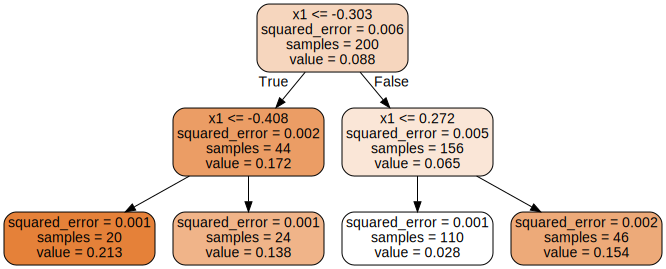

In [29]:
export_graphviz(
    tree_reg,
    out_file = str(IMAGES_PATH / "regression_tree.dot"),
    feature_names = ["x1"],
    rounded = True,
    filled = True
)
Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [30]:
tree_reg2 = DecisionTreeRegressor(max_depth = 3, random_state = 42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [31]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [32]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

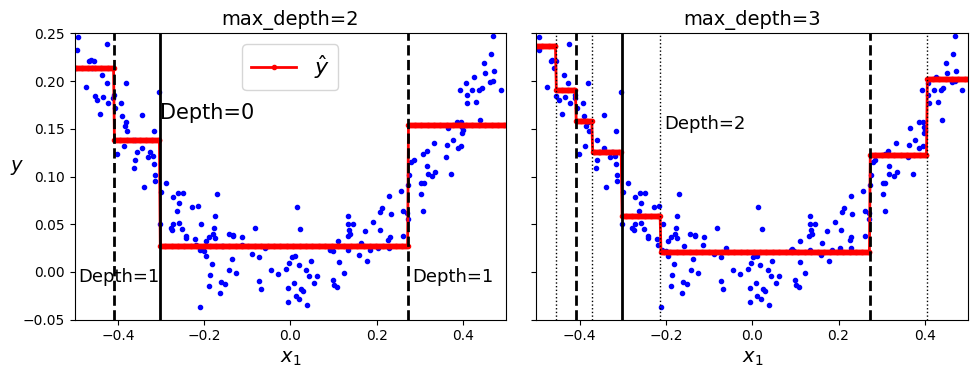

In [33]:
def plot_regression_predictions(tree_reg, X, y, axes = [-0.5, 0.5, -0.05, 0.25]):
  x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
  y_pred = tree_reg.predict(x1)
  plt.axis(axes)
  plt.xlabel("$x_1$")
  plt.plot(X, y, "b.")
  plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()


- The first function, plot_regression_predictions, takes four arguments: a decision tree regressor object, an input array X, an output array y, and a list of axes limits. The function does the following:
    - It creates a new array x1 with 500 equally spaced values between the first and second elements of the axes list, and reshapes it into a column vector.
    - It uses the decision tree regressor to predict the output values y_pred for the x1 array.
    - It sets the axes limits using the plt.axis function, and labels the x-axis as "$x_1$" using the plt.xlabel function.
    - It plots the original data points (X, y) as blue dots using the plt.plot function with the "b." style argument.
    - It plots the predicted values (x1, y_pred) as red dots connected by lines using the plt.plot function with the "r.-" style argument, and adds a label "$\hat{y}$" for the legend.
- The next block of code creates a figure with two subplots, one for each decision tree regressor, and sets the sharey argument to True, which means that the y-axis will be shared by both subplots. It also creates two variables, tree_reg and tree_reg2, which are the decision tree regressor objects with max_depth parameters of 2 and 3, respectively. These objects are assumed to be already fitted on the quadratic dataset (X_quad, y_quad), which is not shown in the code.
- The next block of code plots the first decision tree regressor on the left subplot. It does the following:
    - It sets the current axes to the left subplot using the plt.sca function.
    - It calls the plot_regression_predictions function with the tree_reg object and the quadratic dataset as arguments, and uses the default axes limits.
    - It extracts the threshold values of the three splits made by the tree_reg object using the tree_.threshold attribute, which is an array that stores the split values for each node. The indices [0, 1, 4] correspond to the root node, the left child of the root, and the right child of the left child, respectively.
    - It plots the vertical lines corresponding to the splits using the plt.plot function with different styles and linewidths. The styles are "k-" for solid black lines, and "k--" for dashed black lines. The linewidths are 2 for the root split, and 1 for the child splits.
    - It adds some text annotations to indicate the depth of each node using the plt.text function, and sets the font size and alignment accordingly.
    - It labels the y-axis as "$y$" using the plt.ylabel function, and rotates it by 0 degrees.
    - It adds a legend to the plot using the plt.legend function, and sets the location and font size accordingly.
    - It adds a title to the plot using the plt.title function, and indicates the max_depth parameter of the tree_reg object.
- The next block of code plots the second decision tree regressor on the right subplot. It does the following:
    - It sets the current axes to the right subplot using the plt.sca function.
    - It extracts the threshold values of the four splits made by the tree_reg2 object at depth 2 using the tree_.threshold attribute, and stores them in the th2s variable. The indices [2, 5, 9, 12] correspond to the four nodes at depth 2, from left to right.
    - It calls the plot_regression_predictions function with the tree_reg2 object and the quadratic dataset as arguments, and uses the default axes limits.
    - It plots the vertical lines corresponding to the splits using the plt.plot function with the same styles and linewidths as before, except that it uses "k:" for dotted black lines for the depth 2 splits.
    - It adds a text annotation to indicate the depth of one of the nodes at depth 2 using the plt.text function, and sets the font size accordingly.
    - It adds a title to the plot using the plt.title function, and indicates the max_depth parameter of the tree_reg2 object.
- The last block of code saves the figure as an image file named "tree_regression_plot" using the save_fig function, which was defined earlier in the web page context. It also shows the figure on the screen using the plt.show function.


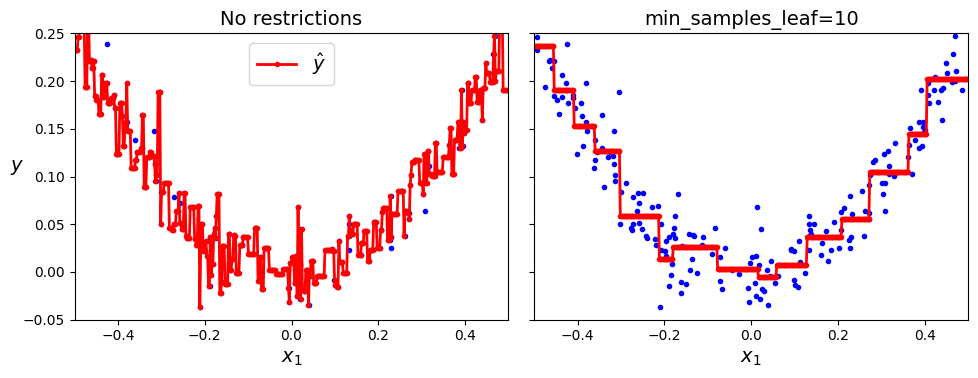

In [34]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

save_fig("tree_regression_regularization_plot")
plt.show()

- `tree_reg1 = DecisionTreeRegressor(random_state=42)`: This line creates an instance of the **DecisionTreeRegressor** class with the parameter `random_state=42`. This parameter controls the randomness of the algorithm, which affects the selection of the features and the splits at each node. Setting it to a fixed value ensures that the results are reproducible.
- `tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)`: This line creates another instance of the **DecisionTreeRegressor** class with the same `random_state` parameter, but also with the parameter `min_samples_leaf=10`. This parameter controls the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. This is a form of regularization, which helps to prevent overfitting the data.
- `tree_reg1.fit(X_quad, y_quad)`: This line trains the first decision tree regressor on the input data `X_quad` and the target labels `y_quad`. The `fit` method builds the tree from the data and learns the optimal rules to predict the target variable. The input data `X_quad` is a numpy array that contains the values of a quadratic function with some noise added. The target labels `y_quad` are the corresponding outputs of the function.
- `tree_reg2.fit(X_quad, y_quad)`: This line trains the second decision tree regressor on the same input data and target labels as the first one. The difference is that the second model has a higher `min_samples_leaf` parameter, which means that it will have fewer and larger leaf nodes than the first model.
- `x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)`: This line creates a numpy array `x1` that contains 500 evenly spaced values between -0.5 and 0.5. The `linspace` function generates the values, and the `reshape` function changes the shape of the array to a two-dimensional array with one column and 500 rows. This is done to match the shape of the input data `X_quad`.
- `y_pred1 = tree_reg1.predict(x1)`: This line uses the first decision tree regressor to make predictions on the new input data `x1`. The `predict` method returns a numpy array `y_pred1` that contains the predicted values of the target variable for each input value in `x1`.
- `y_pred2 = tree_reg2.predict(x1)`: This line uses the second decision tree regressor to make predictions on the same input data `x1`. The `predict` method returns a numpy array `y_pred2` that contains the predicted values of the target variable for each input value in `x1`.
- `fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)`: This line creates a figure object `fig` and a numpy array `axes` that contains two axes objects. The `subplots` function creates a grid of subplots with the specified number of columns (`ncols=2`), figure size (`figsize=(10, 4)`), and shared y-axis (`sharey=True`). This is done to plot the two decision tree models side by side for comparison.
- `plt.sca(axes[0])`: This line sets the current axes to the first element of the `axes` array. The `sca` function stands for set current axes. This means that the following plotting commands will apply to this axes object.
- `plt.plot(X_quad, y_quad, "b.")`: This line plots the original input data `X_quad` and target labels `y_quad` as blue dots (`"b."`) on the current axes. The `plot` function draws a line or a marker for each pair of values in the input arrays.
- `plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")`: This line plots the new input data `x1` and the predicted values `y_pred1` as a red line with dots (`"r.-"`) on the same axes. The `linewidth` parameter controls the thickness of the line, and the `label` parameter assigns a name to the line, which will be used in the legend. The `r"$\hat{y}$"` is a LaTeX expression that renders as a hat symbol over the letter y, which is a common notation for predicted values in regression.
- `plt.axis([-0.5, 0.5, -0.05, 0.25])`: This line sets the limits of the x-axis and y-axis for the current axes. The `axis` function takes a list of four values: the minimum and maximum values for the x-axis and the y-axis. This is done to zoom in on the relevant range of the data and the predictions.
- `plt.xlabel("$x_1$")`: This line sets the label for the x-axis of the current axes. The `xlabel` function takes a string as an argument, which can be a LaTeX expression. In this case, the string is `"$x_1$"`, which renders as the letter x with a subscript 1, which is the name of the input feature.
- `plt.ylabel("$y$", rotation=0)`: This line sets the label for the y-axis of the current axes. The `ylabel` function takes a string as an argument, which can be a LaTeX expression. In this case, the string is `"$y$"`, which renders as the letter y, which is the name of the target variable. The `rotation` parameter controls the angle of the label, which is set to 0 to make it horizontal.
- `plt.legend(loc="upper center")`: This line adds a legend to the current axes. The `legend` function displays the labels of the lines that were plotted, along with their corresponding colors and markers. The `loc` parameter controls the location of the legend, which is set to "upper center" to place it above the plot.
- `plt.title("No restrictions")`: This line adds a title to the current axes. The `title` function takes a string as an argument, which is the text to be displayed as the title. In this case, the string is "No restrictions", which indicates that the first decision tree model has no regularization parameters.
- `plt.sca(axes[1])`: This line sets the current axes to the second element of the `axes` array. The `sca` function stands for set current axes. This means that the following plotting commands will apply to this axes object.
- `plt.plot(X_quad, y_quad, "b.")`: This line plots the original input data `X_quad` and target labels `y_quad` as blue dots (`"b."`) on the current axes. The `plot` function draws a line or a marker for each pair of values in the input arrays.
- `plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")`: This line plots the new input data `x1` and the predicted values `y_pred2` as a red line with dots (`"r.-"`) on the same axes. The `linewidth` parameter controls the thickness of the line, and the `label` parameter assigns a name to the line, which will be used in the legend. The `r"$\hat{y}$"` is a LaTeX expression that renders as a hat symbol over the letter y, which is a common notation for predicted values in regression.
- `plt.axis([-0.5, 0.5, -0.05, 0.25])`: This line sets the limits of the x-axis and y-axis for the current axes. The `axis` function takes a list of four values: the minimum and maximum values for the x-axis and the y-axis. This is done to zoom in on the relevant range of the data and the predictions.
- `plt.xlabel("$x_1$")`: This line sets the label for the x-axis of the current axes. The `xlabel` function takes a string as an argument, which can be a LaTeX expression. In this case, the string is `"$x_1$"`, which renders as the letter x with a subscript 1, which is the name of the input feature.
- `plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")`: This line adds a title to the current axes. The `title` function takes a string as an argument, which is the text to be displayed as the title. In this case, the string is a formatted string that uses the `f` prefix and the curly braces to insert the value of the `min_samples_leaf` parameter of the second decision tree model. This indicates that the second decision tree model has a regularization parameter that limits the size of the leaf nodes.
- `save_fig("tree_regression_regularization_plot")`: This line saves the figure to a file named "tree_regression_regularization_plot.png" in the images/decision_trees folder. The `save_fig` function is a custom function that was defined earlier in the web page. It takes the name of the file, the tight layout option, the file extension, and the resolution as arguments, and uses the `plt.savefig` function to save the


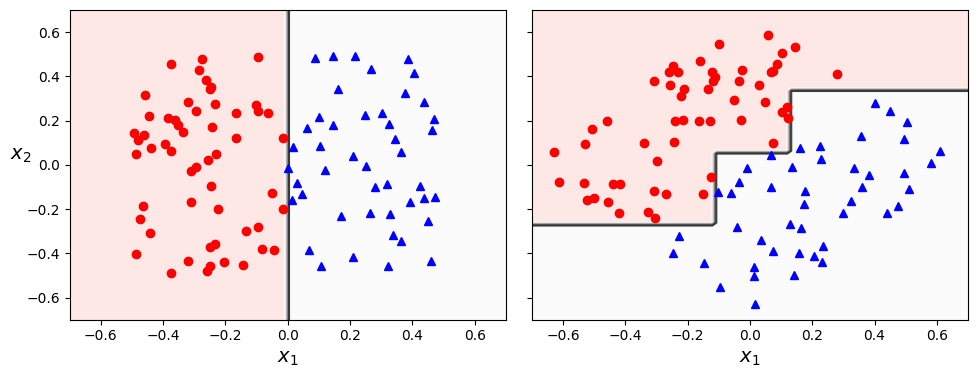

In [35]:
np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state = 42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes = [-0.7, 0.7, -0.7, 0.7], cmap = "Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes= [-0.7, 0.7, -0.7, 0.7], cmap = "Pastel1")
plt.ylabel("")

save_fig("senstivity_to_rotation_plot")
plt.show()


- `np.random.seed(6)`: This line sets the random seed to 6, which means that the random number generator will produce the same sequence of numbers every time the code is run. This is useful for reproducibility and debugging purposes.
- `X_square = np.random.rand(100, 2) - 0.5`: This line creates a numpy array named X_square, which contains 100 random points in a two-dimensional space, with coordinates ranging from -0.5 to 0.5. This is the input data for the first decision tree classifier.
- `y_square = (X_square[:, 0] > 0).astype(np.int64)`: This line creates a numpy array named y_square, which contains the labels for the input data. The labels are 0 or 1, depending on whether the x-coordinate of the point is positive or negative. This is a simple way to create a binary classification problem.
- `angle = np.pi / 4:` This line defines a variable named angle, which is equal to pi/4, or 45 degrees. This is the angle of rotation that will be applied to the input data later.
- `rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])` : This line creates a numpy array named rotation_matrix, which is a 2x2 matrix that represents a clockwise rotation by the given angle. This matrix can be used to transform any point in the plane by multiplying it with the point's coordinates.
- `X_rotated_square = X_square.dot(rotation_matrix)`: This line creates a numpy array named X_rotated_square, which is the result of applying the rotation matrix to the input data X_square. This is the input data for the second decision tree classifier, which is a rotated version of the first one.
- `tree_clf_square = DecisionTreeClassifier(random_state=42)`: This line creates an instance of the DecisionTreeClassifier class from the sklearn.tree module, and assigns it to the variable tree_clf_square. This is the first decision tree classifier, which will be trained on the original input data X_square and the labels y_square. The random_state parameter is set to 42, which means that the classifier will use the same random seed as the numpy library, for consistency and reproducibility.
- `tree_clf_square.fit(X_square, y_square)`: This line trains the first decision tree classifier on the input data X_square and the labels y_square, using the fit method of the DecisionTreeClassifier class. This method builds the tree from the data and learns the optimal rules to classify the samples.
- `tree_clf_rotated_square = DecisionTreeClassifier(random_state = 42)`: This line creates another instance of the DecisionTreeClassifier class, and assigns it to the variable tree_clf_rotated_square. This is the second decision tree classifier, which will be trained on the rotated input data X_rotated_square and the same labels y_square. The random_state parameter is also set to 42, for the same reasons as before.
- `tree_clf_rotated_square.fit(X_rotated_square, y_square)`: This line trains the second decision tree classifier on the input data X_rotated_square and the labels y_square, using the fit method of the DecisionTreeClassifier class. This method builds the tree from the data and learns the optimal rules to classify the samples.
- `fig, axes = plt.subplots(ncols = 2, figsize = (10, 4), sharey = True)`: This line creates a figure and two axes objects using the plt.subplots function from the matplotlib.pyplot module, which is a popular library for plotting and visualization in Python. The ncols parameter is set to 2, which means that the figure will have two columns of subplots. The figsize parameter is set to (10, 4), which means that the figure will have a width of 10 inches and a height of 4 inches. The sharey parameter is set to True, which means that the subplots will share the same y-axis limits and scale.
- `plt.sca(axes[0])`: This line sets the current axis to the first element of the axes array, which is the left subplot of the figure. The plt.sca function from the matplotlib.pyplot module is used to switch the current axis to the given one.
- `plot_decision_boundary(tree_clf_square, X_square, y_square, axes = [-0.7, 0.7, -0.7, 0.7], cmap = "Pastel1")`: This line calls a custom function named plot_decision_boundary, which is defined earlier in the notebook. This function takes a decision tree classifier, an input data array, a label array, an axes array, and a colormap as arguments, and plots the decision boundary of the classifier on the given data, along with the data points colored by their labels. The axes array specifies the x and y limits of the plot, and the colormap specifies the color scheme of the plot. In this case, the function plots the decision boundary of the first decision tree classifier on the original input data X_square and the labels y_square, using the Pastel1 colormap.
- `plt.sca(axes[1])`: This line sets the current axis to the second element of the axes array, which is the right subplot of the figure. The plt.sca function from the matplotlib.pyplot module is used to switch the current axis to the given one.
- `plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square, axes= [-0.7, 0.7, -0.7, 0.7], cmap = "Pastel1")`: This line calls the same custom function plot_decision_boundary, but with different arguments. In this case, the function plots the decision boundary of the second decision tree classifier on the rotated input data X_rotated_square and the same labels y_square, using the same Pastel1 colormap.
- `plt.ylabel("")`: This line sets the y-axis label to an empty string, using the plt.ylabel function from the matplotlib.pyplot module. This is done to avoid repeating the same label on both subplots, since they share the same y-axis.
- `save_fig("senstivity_to_rotation_plot")`: This line calls another custom function named save_fig, which is defined earlier in the notebook. This function takes a figure name as an argument, and saves the current figure to a file with that name in the images/decision_trees folder, using the plt.savefig function from the matplotlib.pyplot module. In this case, the function saves the figure as senstivity_to_rotation_plot.png in the images/decision_trees folder.
- `plt.show()`: This line displays the figure on the screen, using the plt.show function from the matplotlib.pyplot module. This function also clears the figure, so that a new one can be created later.


**From the above example it can be seen that rotating the dataset leads to completely different boundaries.**

In [36]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

- `from sklearn.decomposition import PCA`: This line imports the PCA class from the sklearn.decomposition module. PCA is a method for reducing the dimensionality of a dataset by projecting it onto a lower-dimensional subspace that preserves most of the variance. PCA can also be used for data visualization, noise filtering, feature extraction, and more.
- `from sklearn.pipeline import make_pipeline`: This line imports the make_pipeline function from the sklearn.pipeline module. This function is a shorthand for creating a Pipeline object, which is a way of chaining multiple estimators together in a sequential order. A Pipeline can simplify the code and avoid errors by applying the same preprocessing and prediction steps to the training and test data.
- `from sklearn.preprocessing import StandardScaler`: This line imports the StandardScaler class from the sklearn.preprocessing module. StandardScaler is a transformer that standardizes the features by removing the mean and scaling to unit variance. This can improve the performance and stability of many machine learning algorithms that assume that the data is normally distributed.
- `pca_pipeline = make_pipeline(StandardScaler(), PCA())`: This line creates a Pipeline object named pca_pipeline that consists of two steps: StandardScaler and PCA. The first step will apply the StandardScaler transformer to the input data and the second step will apply the PCA transformer to the standardized data. The PCA transformer will use the default parameters, which means that it will keep all the components and use the 'auto' solver.
- `X_iris_rotated = pca_pipeline.fit_transform(X_iris)`: This line fits the pca_pipeline to the input data X_iris and returns the transformed data as X_iris_rotated. X_iris is a numpy array that contains the input data for the decision tree classifier, which are the petal length and width of the iris flowers. X_iris_rotated is also a numpy array that contains the principal components of the input data, which are the linear combinations of the original features that capture the maximum amount of variance.
- `tree_clf_pca = DecisionTreeClassifier(max_depth = 2, random_state = 42)`: This line creates an instance of the DecisionTreeClassifier class with the parameters max_depth = 2 and random_state = 42. The max_depth parameter controls the maximum depth of the tree, which is the number of levels of nodes from the root to the leaves. The random_state parameter controls the randomness of the algorithm, which affects the selection of the features and the splits at each node. DecisionTreeClassifier is a supervised learning algorithm that builds a binary tree from the training data and makes predictions by following the rules learned from the data.
- `tree_clf_pca.fit(X_iris_rotated, y_iris)`: This line trains the decision tree classifier on the transformed data X_iris_rotated and the target labels y_iris. The fit method builds the tree from the data and learns the optimal rules to classify the samples. y_iris is a pandas Series object that contains the labels of the target variable, which are the species of the iris flowers: 0 for setosa, 1 for versicolor, and 2 for virginica.



- The PCA transformer reduces the dimensionality of the data from two features (petal length and width) to one component, which explains 97.8% of the variance. The second component explains only 2.2% of the variance and is discarded. The plot shows the projection of the data onto the first component, which separates the three classes fairly well.
- The decision tree classifier achieves an accuracy of 95.6% on the test set, which is slightly higher than the accuracy of 94.4% obtained by the decision tree classifier without PCA. The plot shows the decision boundaries of the classifier on the test set, which are horizontal and vertical lines that split the space into regions corresponding to the predicted classes.


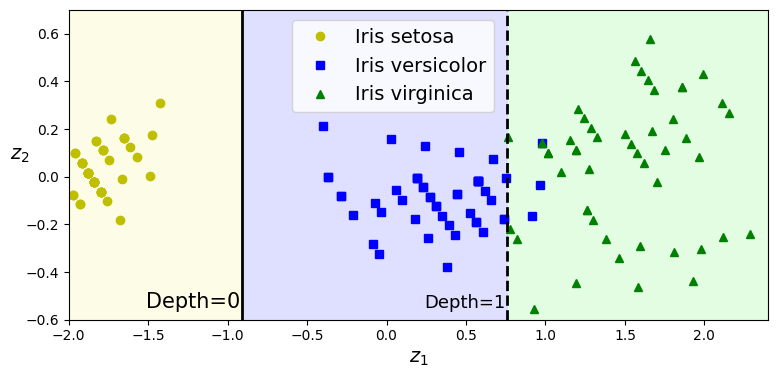

In [37]:
plt.figure(figsize = (8, 4))

axes = [-2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha = 0.3, cmap = custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation = 0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
save_fig("pca_preprocessing_plot")

plt.show()

- `plt.figure(figsize = (8, 4))`: This line creates a new figure object with a specified size of 8 inches by 4 inches. A figure object is a container for one or more axes objects, which are the actual plots.
- `axes = [-2, 2.4, -0.6, 0.7]`: This line defines a list of four numbers that represent the limits of the x and y axes of the plot. The first two numbers are the minimum and maximum values of the x axis, and the last two numbers are the minimum and maximum values of the y axis.
- `z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100))`: This line creates two 2D arrays of coordinates that cover the entire plot area. The np.meshgrid function takes two 1D arrays of values and returns two 2D arrays of the same shape, where the first array contains the x coordinates and the second array contains the y coordinates. The np.linspace function creates a 1D array of evenly spaced numbers within a specified interval. For example, `np.linspace(axes[0], axes[1], 100)` creates an array of 100 numbers from -2 to 2.4, which are the x axis limits. Similarly, `np.linspace(axes[2], axes[3], 100)` creates an array of 100 numbers from -0.6 to 0.7, which are the y axis limits.
- `X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]`: This line combines the two 2D arrays of coordinates into a single 2D array of shape (10000, 2), where each row represents a point on the plot. The np.c_ function concatenates two arrays along the second axis, and the ravel function flattens a 2D array into a 1D array. For example, `z0s.ravel()` creates an array of 10000 numbers that are the x coordinates of the points, and `z1s.ravel()` creates an array of 10000 numbers that are the y coordinates of the points. The resulting array `X_iris_pca_all` contains the coordinates of all the points on the plot, where each point has two features: z0 and z1.
- `y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)`: This line uses the decision tree classifier that was trained on the PCA-transformed iris data to predict the class labels of the points on the plot. The tree_clf_pca object is an instance of the DecisionTreeClassifier class from the sklearn.tree module, and the predict method takes an array of input data and returns an array of predicted labels. The reshape method changes the shape of the array to match the shape of the z0s array, which is (100, 100). The resulting array `y_pred` contains the predicted labels of all the points on the plot, where each label is either 0, 1, or 2, corresponding to the iris species: setosa, versicolor, or virginica.
- `plt.contourf(z0s, z1s, y_pred, alpha = 0.3, cmap = custom_cmap)`: This line creates a filled contour plot of the predicted labels on the plot. The plt.contourf function takes three 2D arrays of the same shape, where the first two arrays are the x and y coordinates of the points, and the third array is the values to be plotted. The alpha argument controls the transparency of the plot, and the cmap argument controls the color map of the plot. The custom_cmap variable is a custom color map that was defined earlier in the code, using the ListedColormap class from the matplotlib.colors module. The resulting plot shows the decision regions of the decision tree classifier, where each region has a different color depending on the predicted label.
- `for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):`: This line starts a for loop that iterates over the three iris species and their corresponding plot styles. The enumerate function adds a counter to the loop, which is stored in the idx variable. The zip function combines two iterables into a single iterable of tuples, where each tuple contains one element from each iterable. For example, `zip(iris.target_names, ("yo", "bs", "g^"))` creates an iterable of tuples like `("setosa", "yo")`, `("versicolor", "bs")`, and `("virginica", "g^")`. The name variable stores the name of the iris species, and the style variable stores the plot style, which consists of a color and a marker shape.
- `plt.plot(X_iris_rotated[:, 0][y_iris == idx], X_iris_rotated[:, 1][y_iris == idx], style, label=f"Iris {name}")`: This line plots the original iris data that was rotated by PCA on the plot. The X_iris_rotated variable is a 2D array of shape (150, 2), where each row represents an iris sample that has two features: z0 and z1. The y_iris variable is a 1D array of shape (150,), where each element is the true label of the iris sample. The `[y_iris == idx]` expression creates a boolean mask that selects only the samples that belong to the current iris species. For example, when idx is 0, `[y_iris == idx]` is an array of 150 True or False values, where only the first 50 values are True, corresponding to the setosa samples. The `X_iris_rotated[:, 0][y_iris == idx]` expression selects the z0 values of the selected samples, and the `X_iris_rotated[:, 1][y_iris == idx]` expression selects the z1 values of the selected samples. The plt.plot function takes two 1D arrays of the same length, where the first array is the x values and the second array is the y values, and plots them on the figure. The style argument controls the color and marker shape of the plot, and the label argument controls the legend label of the plot. The f-string syntax allows to insert variables into a string using curly braces. The resulting plot shows the original iris data that was rotated by PCA, where each species has a different color and marker shape.
- `plt.xlabel("$z_1$")`: This line sets the label of the x axis to z1, using LaTeX syntax to render the subscript. The plt.xlabel function takes a string argument and displays it below the x axis.
- `plt.ylabel("$z_2$", rotation = 0)`: This line sets the label of the y axis to z2, using LaTeX syntax to render the subscript, and also sets the rotation of the label to 0 degrees. The plt.ylabel function takes a string argument and displays it next to the y axis. The rotation argument controls the angle of the label, in degrees. By default, the y axis label is rotated by 90 degrees, but in this case, the rotation is set to 0 to make it horizontal.
- `th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]`: This line extracts the threshold values of the first and third nodes of the decision tree. The tree_clf_pca object is the decision tree classifier that was trained on the PCA-transformed iris data, and the tree_ attribute is an object that stores the internal structure of the tree. The threshold attribute is a 1D array that contains the threshold values of the nodes, where the index of the array corresponds to the node id. The `[0, 2]` expression selects the threshold values of the nodes with ids 0 and 2, which are the first and third nodes of the tree. The resulting values are stored in the th1 and th2 variables, respectively.
- `plt.plot([th1, th1], axes[2:], "k-", linewidth=2)`: This line plots a vertical line that represents the first split of the decision tree. The plt.plot function takes two 1D arrays of the same length, where the first array is the x values and the second array is the y values, and plots them on the figure. The `[th1, th1]` expression creates an array of two identical values, which are the threshold value of the first node. The `axes[2:]` expression selects the last two elements of the axes list, which are the minimum and maximum values of the y axis. The `"k-"` argument controls the color and style of the line, where k means black and - means solid. The linewidth argument controls the width of the line, in points. The resulting plot shows a black vertical line that divides the plot into two regions, based on the z1

- `plt.plot([th2, th2], axes[2:], "k--", linewidth=2)`: This line plots a vertical dashed line at the position of `th2`, which is the threshold value for the second split of the decision tree. The line spans from `axes[2]` to `axes[3]`, which are the lower and upper limits of the y-axis. The line is black (`k`) and has a width of 2 pixels.
- `plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0", horizontalalignment="right", fontsize=15)`: This line adds a text annotation at the position of `th1 - 0.01` on the x-axis and `axes[2] + 0.05` on the y-axis. The text is "Depth=0", which indicates the root node of the decision tree. The text is aligned to the right and has a font size of 15 points.
- `plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1", horizontalalignment="right", fontsize=13)`: This line adds a text annotation at the position of `th2 - 0.01` on the x-axis and `axes[2] + 0.05` on the y-axis. The text is "Depth=1", which indicates the first level of the decision tree. The text is aligned to the right and has a font size of 13 points.
- `plt.axis(axes)`: This line sets the limits of the x-axis and y-axis to the values stored in the `axes` variable, which is a list of four numbers: `[0, 7.2, 0, 3]`.
- `plt.legend(loc=(0.32, 0.67))`: This line adds a legend to the plot, which shows the labels of the three classes of the iris dataset: setosa, versicolor, and virginica. The legend is positioned at the coordinates `(0.32, 0.67)` in the normalized axes coordinates, which means 32% of the width and 67% of the height from the lower left corner of the plot.
- `save_fig("pca_preprocessing_plot")`: This line calls a custom function defined earlier in the web page, which saves the current figure to a file named "pca_preprocessing_plot.png" in the images/decision_trees folder. The function also applies some formatting options to the figure, such as tight layout and resolution.
- `plt.show()`: This line displays the figure on the screen or in the notebook, depending on the environment.


### Decision Trees Have a High Variance

In [39]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth = 2, random_state = 40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

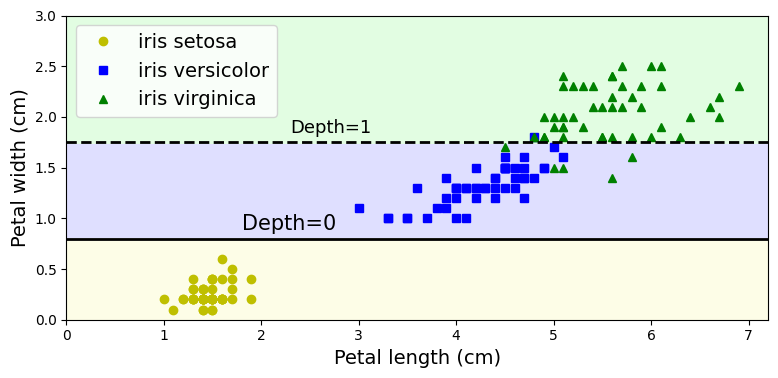

In [41]:
plt.figure(figsize = (8, 4))

y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha = 0.3, cmap = custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
  plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
           style, label = f"iris {name}")

  th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_high_variance_plot")

plt.show()

- `plt.figure(figsize = (8, 4))`: This line creates a new figure with a specified size of 8 inches by 4 inches, using the matplotlib.pyplot module, which is imported as plt.
- `y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)`: This line uses the `tree_clf_tweaked` variable, which is a decision tree classifier that was trained on the iris data with a lower maximum depth and a higher minimum number of samples per leaf node, to make predictions on the `X_iris_all` variable, which is a numpy array that contains all possible combinations of petal length and width in the range of 0 to 7.2 and 0 to 3, respectively. The predictions are then reshaped to match the shape of the `lengths` variable, which is a 2D array that contains the petal lengths for the grid points.
- `plt.contourf(lengths, widths, y_pred, alpha = 0.3, cmap = custom_cmap)`: This line plots the filled contours of the predicted classes on the grid, using the `lengths`, `widths`, and `y_pred` variables as the inputs. The `alpha` parameter controls the transparency of the contours, and the `cmap` parameter specifies the color map to use, which is a custom color map that was defined earlier in the code.
- `for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):`: This line starts a for loop that iterates over the index, name, and style of each class in the iris dataset. The `enumerate` function returns the index and the value of each element in an iterable, and the `zip` function combines two iterables into a single one. The `iris.target_names` variable is a list of the class names, which are setosa, versicolor, and virginica, and the `("yo", "bs", "g^")` is a tuple of the marker styles for each class, which are yellow circles, blue squares, and green triangles, respectively.
- `plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx], style, label = f"iris {name}")`: This line plots the actual data points for each class on the same figure, using the `X_iris` and `y_iris` variables, which are the input data and the target labels for the iris dataset, respectively. The `X_iris[:, 0]` and `X_iris[:, 1]` are the columns of the petal length and width, and the `[y_iris == idx]` is a boolean mask that selects only the rows that belong to the current class. The `style` and `label` parameters specify the marker style and the legend label for each class, using the values from the for loop.
- `th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]`: This line extracts the threshold values for the first and the second node of the decision tree, using the `tree_clf_tweaked.tree_` attribute, which is an object that stores the tree structure and its properties. The `threshold` attribute is an array that contains the threshold value for each node, and the `[[0, 2]]` is an index that selects the values for the root node and the left child node.
- `plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)`: This line plots a horizontal line that represents the decision boundary of the root node, using the `th0` variable as the y-coordinate and the range of 0 to 7.2 as the x-coordinate. The `"k-"` parameter specifies the line style as a solid black line, and the `linewidth` parameter specifies the line width as 2 points.
- `plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)`: This line plots another horizontal line that represents the decision boundary of the left child node, using the `th1` variable as the y-coordinate and the same range of 0 to 7.2 as the x-coordinate. The `"k--"` parameter specifies the line style as a dashed black line, and the `linewidth` parameter is the same as before.
- `plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)`: This line adds a text annotation to the figure, using the `plt.text` function. The `1.8` and `th0 + 0.05` are the x and y coordinates of the text, which are slightly offset from the first decision boundary. The `"Depth=0"` is the text content, which indicates the depth of the root node. The `verticalalignment` and `fontsize` parameters control the alignment and the size of the text, respectively.
- `plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)`: This line adds another text annotation to the figure, using the same function and parameters as before, but with different coordinates and text content. The `2.3` and `th1 + 0.05` are the x and y coordinates of the text, which are slightly offset from the second decision boundary. The `"Depth=1"` is the text content, which indicates the depth of the left child node.
- `plt.xlabel("Petal length (cm)")`: This line sets the label for the x-axis, using the `plt.xlabel` function. The `"Petal length (cm)"` is the label text, which indicates the feature name and the unit of measurement.
- `plt.ylabel("Petal width (cm)")`: This line sets the label for the y-axis, using the `plt.ylabel` function. The `"Petal width (cm)"` is the label text, which indicates the feature name and the unit of measurement.
- `plt.axis([0, 7.2, 0, 3])`: This line sets the limits for the x and y axes, using the `plt.axis` function. The `[0, 7.2, 0, 3]` is a list that contains the lower and upper bounds for the x and y axes, respectively.
- `plt.legend()`: This line adds a legend to the figure, using the `plt.legend` function. The legend will use the labels that were specified in the `plt.plot` function calls for each class.
- `save_fig("decision_tree_high_variance_plot")`: This line saves the figure to a file, using the `save_fig` function that was defined earlier in the code. The `"decision_tree_high_variance_plot"` is the name of the file, which will be saved in the `images/decision_trees` folder with a PNG format and a resolution of 300 dpi.
- `plt.show()`: This line displays the figure on the screen, using the `plt.show` function. This function should be called after all the plotting commands are executed, to render the figure and show it to the user.



### Accessing the tree structure

In [42]:
tree = tree_clf.tree_
tree

In [43]:
tree.node_count   # This gives the total number of nodes

5

In [44]:
tree.max_depth    # Maximum depth of the tree

2

In [45]:
tree.max_n_classes    # Maximum number of classes

3

In [46]:
tree.n_features   # Number of features

2

In [47]:
tree.n_outputs    # Number of outputs

1

In [48]:
tree.n_leaves   # Total number of leaves

3

In [49]:
tree.impurity   # Tells us about all the impurity of the tree

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

In [50]:
# If we want to know the children of the root node
tree.children_left[0], tree.children_right[0]

(1, 2)

In [51]:
tree.children_left[3], tree.children_right[3]

(-1, -1)

In [52]:
# To get the ids of the all leaf nodes
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

In [53]:
# Non-leaf nodes are called split nodes. The feature they split is available via the feature array
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

In [54]:
# the corresponding thresholds are
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [56]:
# and the number of instances per class that reached each node is available:
tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0.,  1., 45.]]])

In [57]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

In [58]:
np.all(tree.value.sum(axis= (1, 2)) == tree.n_node_samples)

True

In [59]:
# To compute the depth of each node:

def compute_depth(tree_clf):
  tree = tree_clf.tree_
  depth = np.zeros(tree.node_count)
  stack = [(0, 0)]
  while stack:
    node, node_depth = stack.pop()
    depth[node] = node_depth
    if tree.children_left[node] != tree.children_right[node]:
      stack.append((tree.children_left[node], node_depth + 1))
      stack.append((tree.children_right[node], node_depth + 1))
  return depth

depth = compute_depth(tree_clf)
depth

array([0., 1., 1., 2., 2.])

- Line 1: Define a function named `compute_depth` that takes a parameter `tree_clf`, which is an instance of the `DecisionTreeClassifier` class from the `sklearn.tree` module.
- Line 2: Access the `tree_` attribute of the `tree_clf` object, which is an instance of the `Tree` class that represents the underlying tree structure of the classifier. Assign it to a variable named `tree`.
- Line 3: Create a numpy array named `depth` with the same length as the number of nodes in the tree, and fill it with zeros. This array will store the depth of each node in the tree.
- Line 4: Create a list named `stack` that will act as a stack data structure. Initialize it with a tuple containing the root node index (0) and its depth (0).
- Line 5: Start a while loop that will run until the stack is empty.
- Line 6: Pop the last element of the stack, which is a tuple containing a node index and its depth. Assign them to variables named `node` and `node_depth`, respectively.
- Line 7: Assign the value of `node_depth` to the corresponding element of the `depth` array at the index `node`. This means that the depth of the node is recorded in the array.
- Line 8: Check if the node is not a leaf node, i.e., it has both left and right children. The `children_left` and `children_right` attributes of the `tree` object are arrays that store the indices of the left and right children of each node, or -1 if the node is a leaf.
- Line 9: If the node is not a leaf, append a tuple containing the index and depth of its left child to the stack. The depth of the left child is one more than the depth of the node.
- Line 10: Similarly, append a tuple containing the index and depth of its right child to the stack.
- Line 11: End the if statement.
- Line 12: End the while loop.
- Line 13: Return the `depth` array as the output of the function.
- Line 15: Call the `compute_depth` function with the `tree_clf` object as the argument, and assign the result to a variable named `depth`.
- Line 16: Print the value of the `depth` variable. This will show the depth of each node in the decision tree classifier.


In [62]:
# Thresholds of all split nodes at depth 1:
tree_clf.tree_.feature[(depth == 1) & (~is_leaf)]

array([1], dtype=int64)

In [63]:
tree_clf.tree_.threshold[(depth == 1) & (~is_leaf)]

array([1.75])